Potting Data Analysis
=====================
Here is Jose's original explaination of the data format of the potting log.
>     The attached file contains the potting reference positions used to deposit the sylgard on the HDI, ROC, address
>     and TBM pads for 6 modules

>     it is an array of positions arranged as follows

>     ____

>     The HDI has 16 pads groups (each group has 35 pads). Since the sylgard line must be delivered between two points
>     (start-stop) the first 6 numbers correspond to the first pads group start position and stop position
>                     -
>             |       | pad1-U1-x         241.926502      25/1/2016-18:52:49HDIV3 + module
>     pads    | start | pad1-U1-y         213.485689
>     group   |       | pad1-U1-z         61.871853
>       1     |       -
>             |       | pad35-U1-x        241.942338
>             |  stop | pad35-U1-y        219.910052
>             |       | pad35-U1-x        61.874242
>                     -
>     and so on 

>     thus, THE FIRST 96 NUMBERS are the x,y,z reference positions for the 16 HDI pads groups. Also in the first line
>     there is a time stamp which indicates when the data taking was started and which mode was used (HDIV3 + module
>     means real parts mode).     

>     _____

>     THE NEXT 12 NUMBERS are the reference positions for the address pads (again x,y,z)

>     _____

>     THE NEXT 24 NUMBERS are the reference positions for the HDI-TBM pads (pads where the TBM is wired to the HDI)

>     ______

>     THE NEXT 12 NUMBERS are the reference positions for the TBM pads (again x,y,z)
>     ______

>     THE NEXT 3 NUMBERS are the reference positions for the HV in the HDI side

>     ______

>     The Module has 16 ROCs and then 16 pads groups in the same way as the HDI; the structure is the same as
>     described above for the HDI  so that

>     THE NEXT 96 NUMBERS are the x,y,z reference positions for the 16 HDI pads groups

>     _____

>     THE NEXT (and last) 3 NUMBERS are the reference positions for the HV in the Module side.


>     Every time you see a time stamp, it means that a new potting session was performed.


>     NOTE: there are data for 6 modules in the file, in the first session 2 modules were encapsulated (chuck 2, slots
>     1 and 2 ) , in the second session 1 module was encapsulated (chuck 2, slot 1), in the third session 1 module was
>     encapsulated (chuck 2, slot 1) and in the last session 2 modules were encapsulated (chuck 2, slots 1 and 2). 

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
with open('potting_ref_positions.txt', 'r') as f:
    lines = f.readlines() 

In [2]:
def parse_vectors(lines):
    vecs = []
    lines_iter = iter(lines)
    def tokenize(l):
        l = l.split('#')[-1]
        return [t for t in l.split() if t]
    while lines_iter:
        try:
            x = float(tokenize(next(lines_iter))[0])
            y = float(tokenize(next(lines_iter))[0])
            z = float(tokenize(next(lines_iter))[0])
            vecs.append((x,y,z))
        except IndexError:
            pass
        except StopIteration:
            break
    return vecs
        
vecs = parse_vectors(lines)

class Module:
    n = 82
    def __init__(self, vecs):
        self.hdi_bond_pads = vecs[0:32]  # 32 measurements
        self.address_pads = vecs[32:36]  # 4 measurements
        self.tbm_on_hdi = vecs[36:44]    # 8 measurements
        self.tbm_on_tbm = vecs[44:48]    # 4 measurements
        self.hdi_hv_pad = vecs[48]
        self.roc_bond_pads = vecs[49:81] # 32 measurements
        self.roc_hv_pad = vecs[81]

def parse_modules(vectors):
    n = Module.n
    num_modules = len(vectors)//n
    return [Module(vectors[i*n:(i+1)*n]) for i in range(num_modules)]
    

modules = parse_modules(vecs)

Now that the we have the potting data successfully loaded into our data structures, we can do some plots.

<IPython.core.display.Javascript object>


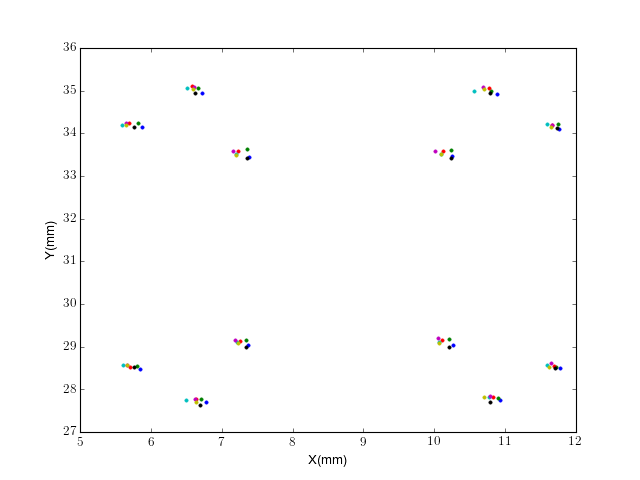

In [3]:
plt.figure()
for module in modules:
    xs = []
    ys = []
    offset_x, offset_y,_ = module.hdi_bond_pads[0]
    for point in module.tbm_on_hdi:
        xs.append(point[0]-offset_x)
        ys.append(point[1]-offset_y)
    for point in module.tbm_on_tbm:
        xs.append(point[0]-offset_x)
        ys.append(point[1]-offset_y)
    plt.plot(xs,ys,'.')
plt.xlabel("X(mm)")
plt.ylabel("Y(mm)")

<IPython.core.display.Javascript object>


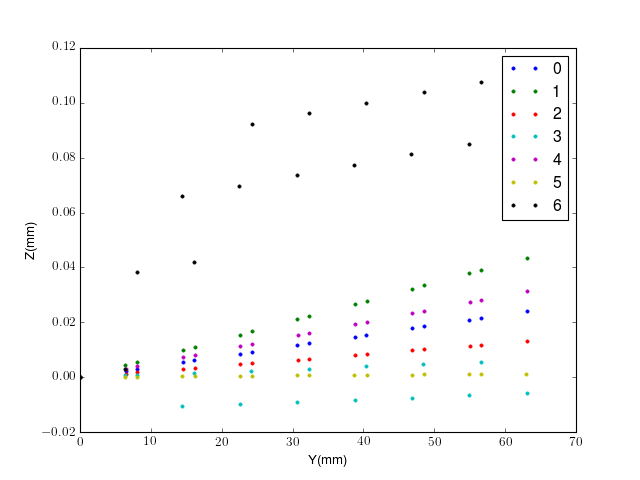

<IPython.core.display.Javascript object>


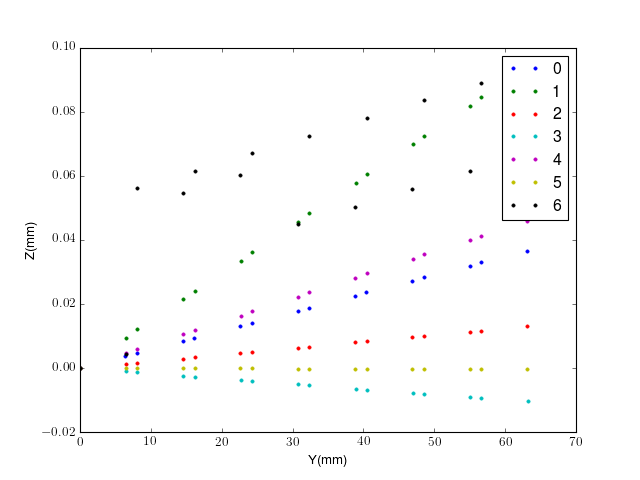

In [4]:
plt.figure()
for i, module in enumerate(modules):
    ys = []
    zs = []
    _, offset_y, offset_z = module.hdi_bond_pads[0]
    for bond_pad in module.hdi_bond_pads[:16]:
        ys.append(bond_pad[1]-offset_y)
        zs.append(bond_pad[2]-offset_z)
    plt.plot(ys,zs,'.', label=str(i))
plt.legend()
plt.xlabel('Y(mm)')
plt.ylabel('Z(mm)')

plt.figure()
for i, module in enumerate(modules):
    ys = []
    zs = []
    _, offset_y, offset_z = module.hdi_bond_pads[16]
    for bond_pad in module.hdi_bond_pads[16:]:
        ys.append(bond_pad[1]-offset_y)
        zs.append(bond_pad[2]-offset_z)
    plt.plot(ys,zs,'.', label=str(i))
plt.legend()
plt.xlabel('Y(mm)')
plt.ylabel('Z(mm)')

        

<IPython.core.display.Javascript object>


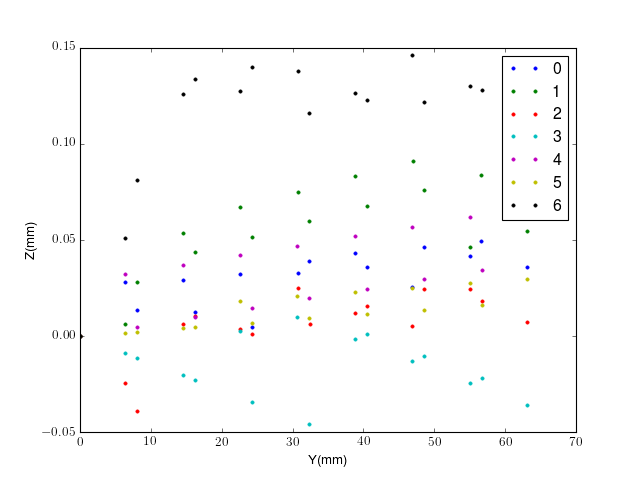

<IPython.core.display.Javascript object>


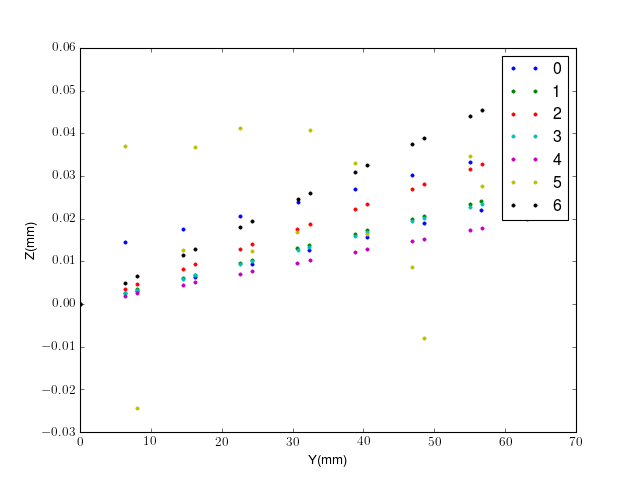

In [5]:
plt.figure()
for i, module in enumerate(modules):
    ys = []
    zs = []
    _, offset_y, offset_z = module.roc_bond_pads[0]
    for bond_pad in module.roc_bond_pads[:16]:
        ys.append(bond_pad[1]-offset_y)
        zs.append(bond_pad[2]-offset_z)
    plt.plot(ys,zs,'.', label=str(i))
plt.legend()
plt.xlabel('Y(mm)')
plt.ylabel('Z(mm)')

plt.figure()
for i, module in enumerate(modules):
    ys = []
    zs = []
    _, offset_y, offset_z = module.roc_bond_pads[16]
    for bond_pad in module.roc_bond_pads[16:]:
        ys.append(bond_pad[1]-offset_y)
        zs.append(bond_pad[2]-offset_z)
    plt.plot(ys,zs,'.', label=str(i))
plt.legend()
plt.xlabel('Y(mm)')
plt.ylabel('Z(mm)')